# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [47]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [21]:
cityname_list = []
lat_list = []
lng_list = []
maxtemp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
country_list = []
date_list = []

record = 0
sets = 1

print("Beginning Data Retrieval")
print("-----------------------------")

base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = base_url + "appid=" + weather_api_key + "&units=" + units + "&q="

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cityname_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])    
        maxtemp_list.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        windspeed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
    
        if record > 49:
            record = 0
            sets = sets + 1
    
        else:
            record = record + 1
        
        print(f"Processing Record {record} of Set {sets} | {city}")
    
    except:
        print(f"City not found. Skipping... {city}.")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
        


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | coihaique
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | northam
Processing Record 4 of Set 1 | nome
City not found. Skipping... illoqqortoormiut.
Processing Record 5 of Set 1 | fuerte olimpo
City not found. Skipping... taolanaro.
Processing Record 6 of Set 1 | whithorn
Processing Record 7 of Set 1 | kalavai
Processing Record 8 of Set 1 | sharjah
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | usinsk
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | wanning
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | palmer
Processing Record 18 of Set 1 | faanui
City not found. Skipping... amderma.
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | cabra
Processing Record 21 of Se

City not found. Skipping... yomitan.
Processing Record 28 of Set 4 | kargasok
Processing Record 29 of Set 4 | wuda
Processing Record 30 of Set 4 | coquimbo
Processing Record 31 of Set 4 | tuatapere
Processing Record 32 of Set 4 | namatanai
Processing Record 33 of Set 4 | longyearbyen
Processing Record 34 of Set 4 | zhuanghe
Processing Record 35 of Set 4 | kondrovo
Processing Record 36 of Set 4 | souillac
Processing Record 37 of Set 4 | salalah
Processing Record 38 of Set 4 | varzea grande
Processing Record 39 of Set 4 | alice springs
City not found. Skipping... khonuu.
Processing Record 40 of Set 4 | orbetello
Processing Record 41 of Set 4 | champerico
Processing Record 42 of Set 4 | isangel
Processing Record 43 of Set 4 | bairiki
Processing Record 44 of Set 4 | loding
Processing Record 45 of Set 4 | kieta
Processing Record 46 of Set 4 | gawler
Processing Record 47 of Set 4 | luang prabang
Processing Record 48 of Set 4 | yarmouth
Processing Record 49 of Set 4 | aquiraz
Processing Recor

Processing Record 5 of Set 8 | nishihara
Processing Record 6 of Set 8 | dwarka
Processing Record 7 of Set 8 | rio gallegos
Processing Record 8 of Set 8 | port hardy
Processing Record 9 of Set 8 | ochakiv
Processing Record 10 of Set 8 | kaitangata
Processing Record 11 of Set 8 | la rioja
Processing Record 12 of Set 8 | los llanos de aridane
Processing Record 13 of Set 8 | kizukuri
Processing Record 14 of Set 8 | bukachacha
Processing Record 15 of Set 8 | bansgaon
Processing Record 16 of Set 8 | lake havasu city
Processing Record 17 of Set 8 | lockhart
Processing Record 18 of Set 8 | shingu
Processing Record 19 of Set 8 | ercis
Processing Record 20 of Set 8 | maurawan
Processing Record 21 of Set 8 | broadstairs
Processing Record 22 of Set 8 | chokurdakh
Processing Record 23 of Set 8 | boyolangu
Processing Record 24 of Set 8 | poronaysk
Processing Record 25 of Set 8 | urumqi
Processing Record 26 of Set 8 | makakilo city
Processing Record 27 of Set 8 | gariaband
Processing Record 28 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
weather_df = pd.DataFrame({
    "City": cityname_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": maxtemp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": windspeed_list,
    "Country": country_list,
    "Date": date_list
})

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coyhaique,-45.5752,-72.0662,7.34,93,75,1.03,CL,1662874424
1,Punta Arenas,-53.1500,-70.9167,4.06,81,0,3.60,CL,1662874425
2,Northam,51.0333,-4.2167,15.90,88,97,3.72,GB,1662874425
3,Nome,64.5011,-165.4064,8.04,76,75,4.12,US,1662874426
4,Fuerte Olimpo,-21.0415,-57.8738,16.16,48,7,2.25,PY,1662874427
...,...,...,...,...,...,...,...,...,...
536,Amahai,-3.3333,128.9167,27.12,79,99,2.06,ID,1662874781
537,São Filipe,14.8961,-24.4956,25.91,82,16,0.51,CV,1662874782
538,Port Augusta,-32.5000,137.7667,17.70,49,1,5.69,AU,1662874782
539,La Ronge,55.1001,-105.2842,13.14,58,0,2.57,CA,1662874783


In [24]:
#Export the city data into a .csv.
weather_df.to_csv(r'/Users/carlv/Desktop/DA_Class_Folder/Week 6 - Python APIs/Week 6 Module Challenge/python-api-challenge/output_data/cities.csv')


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
#  Get the indices of cities that have humidity over 100%.
#SKIPPED

In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#SKIPPED

## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

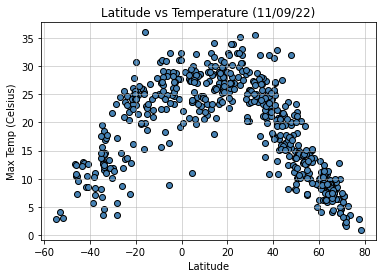

In [31]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

plt.title("Latitude vs Temperature (11/09/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Celsius)")
plt.grid(linestyle="-", linewidth=1, alpha=0.5)

plt.savefig("../output_data/Fig1.png")


## Latitude vs. Humidity Plot

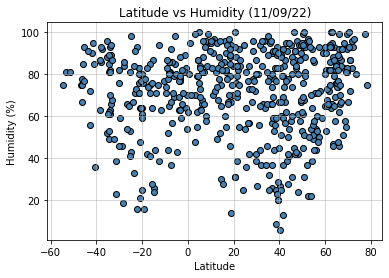

In [33]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

plt.title("Latitude vs Humidity (11/09/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle="-", linewidth=1, alpha=0.5)

plt.savefig("../output_data/Fig2.png")

## Latitude vs. Cloudiness Plot

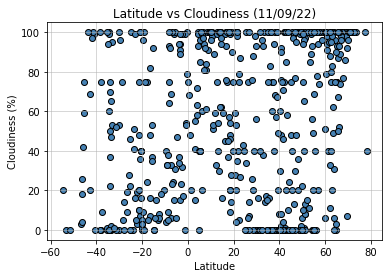

In [35]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

plt.title("Latitude vs Cloudiness (11/09/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle="-", linewidth=1, alpha=0.5)

plt.savefig("../output_data/Fig3.png")

## Latitude vs. Wind Speed Plot

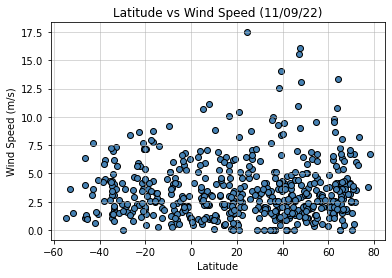

In [38]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

plt.title("Latitude vs Wind Speed (11/09/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(linestyle="-", linewidth=1, alpha=0.5)

plt.savefig("../output_data/Fig4.png")

## Linear Regression

In [43]:
nth_hemi_df = weather_df.loc[weather_df["Lat"] >= 0]
sth_hemi_df = weather_df.loc[weather_df["Lat"] < 0]



In [ ]:
corr1 = st.pearsonr(tumour_avg["Weight (g)"], tumour_avg["Tumour Volume (mm3)"])[0]
print(f"The correlation between mouse weight and average tumour volume is {correlation} ")

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 5, 'y = -0.35x + 32.99')

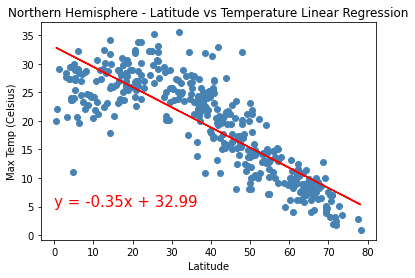

In [60]:
plt.scatter(nth_hemi_df["Lat"], nth_hemi_df["Max Temp"], facecolor = "steelblue")

plt.title("Northern Hemisphere - Latitude vs Temperature Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Celsius)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nth_hemi_df["Lat"], nth_hemi_df["Max Temp"])
regress_values = nth_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nth_hemi_df["Lat"], regress_values, "r-",)
plt.annotate(line_eq, (0,5), fontsize=15, color="red")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(-50, 30, 'y = 0.44x + 29.25')

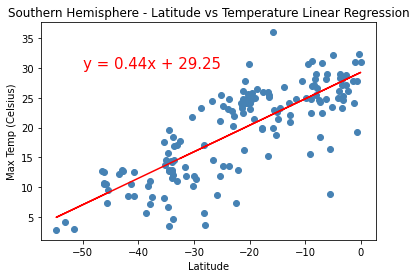

In [61]:
plt.scatter(sth_hemi_df["Lat"], sth_hemi_df["Max Temp"], facecolor = "steelblue")

plt.title("Southern Hemisphere - Latitude vs Temperature Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Celsius)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sth_hemi_df["Lat"], sth_hemi_df["Max Temp"])
regress_values = sth_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(sth_hemi_df["Lat"], regress_values, "r-",)
plt.annotate(line_eq, (-50,30), fontsize=15, color="red")

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 5, 'y = 0.01x + 71.8')

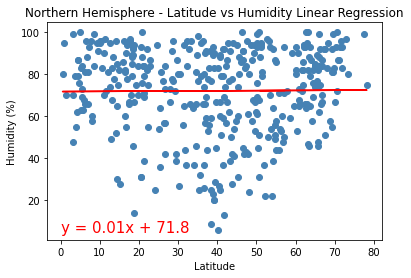

In [63]:
plt.scatter(nth_hemi_df["Lat"], nth_hemi_df["Humidity"], facecolor = "steelblue")

plt.title("Northern Hemisphere - Latitude vs Humidity Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nth_hemi_df["Lat"], nth_hemi_df["Humidity"])
regress_values = nth_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nth_hemi_df["Lat"], regress_values, "r-",)
plt.annotate(line_eq, (0,5), fontsize=15, color="red")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(-55, 25, 'y = -0.12x + 66.77')

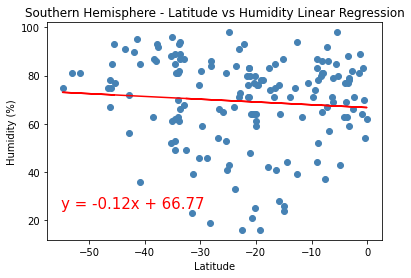

In [67]:
plt.scatter(sth_hemi_df["Lat"], sth_hemi_df["Humidity"], facecolor = "steelblue")

plt.title("Southern Hemisphere - Latitude vs Humidity Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sth_hemi_df["Lat"], sth_hemi_df["Humidity"])
regress_values = sth_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(sth_hemi_df["Lat"], regress_values, "r-",)
plt.annotate(line_eq, (-55,25), fontsize=15, color="red")

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(8, 65, 'y = 0.2x + 52.55')

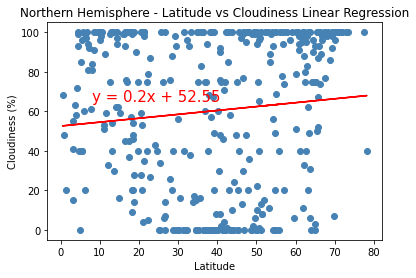

In [68]:
plt.scatter(nth_hemi_df["Lat"], nth_hemi_df["Cloudiness"], facecolor = "steelblue")

plt.title("Northern Hemisphere - Latitude vs Cloudiness Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nth_hemi_df["Lat"], nth_hemi_df["Cloudiness"])
regress_values = nth_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nth_hemi_df["Lat"], regress_values, "r-",)
plt.annotate(line_eq, (8,65), fontsize=15, color="red")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(-50, 85, 'y = 0.32x + 47.92')

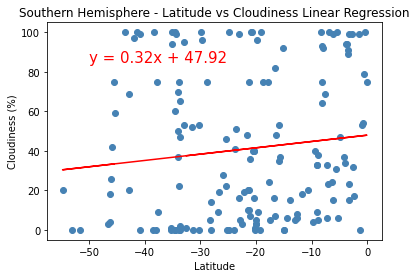

In [69]:
plt.scatter(sth_hemi_df["Lat"], sth_hemi_df["Cloudiness"], facecolor = "steelblue")

plt.title("Southern Hemisphere - Latitude vs Cloudiness Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sth_hemi_df["Lat"], sth_hemi_df["Cloudiness"])
regress_values = sth_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(sth_hemi_df["Lat"], regress_values, "r-",)
plt.annotate(line_eq, (-50,85), fontsize=15, color="red")

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 15, 'y = 0.01x + 3.26')

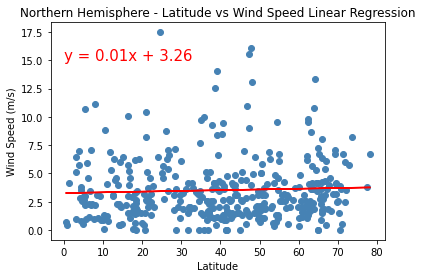

In [72]:
plt.scatter(nth_hemi_df["Lat"], nth_hemi_df["Wind Speed"], facecolor = "steelblue")

plt.title("Northern Hemisphere - Latitude vs Wind Speed Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nth_hemi_df["Lat"], nth_hemi_df["Wind Speed"])
regress_values = nth_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nth_hemi_df["Lat"], regress_values, "r-",)
plt.annotate(line_eq, (0,15), fontsize=15, color="red")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(-50, 9, 'y = 0.0x + 3.45')

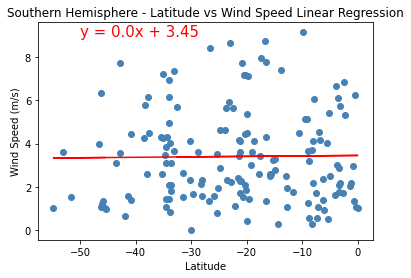

In [75]:
plt.scatter(sth_hemi_df["Lat"], sth_hemi_df["Wind Speed"], facecolor = "steelblue")

plt.title("Southern Hemisphere - Latitude vs Wind Speed Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sth_hemi_df["Lat"], sth_hemi_df["Wind Speed"])
regress_values = sth_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(sth_hemi_df["Lat"], regress_values, "r-",)
plt.annotate(line_eq, (-50,9), fontsize=15, color="red")